In [2]:
# This is a python file that:
# explore the basic informations of the database

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
vgdata = pd.read_csv('vgsales.csv')
print(vgdata.shape)
vgdata.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
vgdata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [28]:
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [33]:
# find the game with highest global sales
hs = vgdata[vgdata.Global_Sales == vgdata.Global_Sales.max()]
hs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Text(0.5, 1.0, 'Year wise global game sales :')

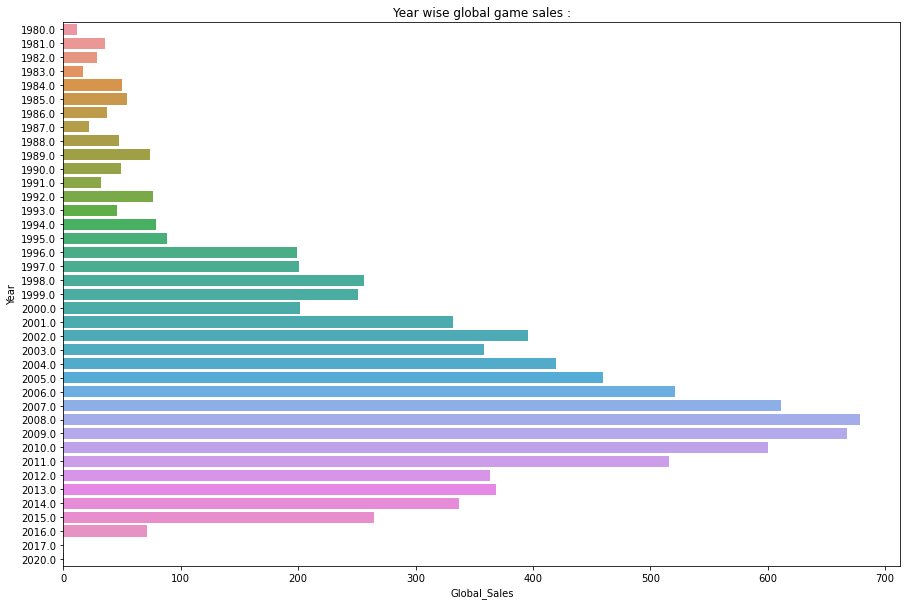

In [34]:
# visualize global avg game sales year wise
plt.rcParams['figure.figsize'] = (15,10)
year_wise_game_sales  = pd.pivot_table(vgdata ,index = 'Year' ,
                                       values = 'Global_Sales',
                                       aggfunc = np.sum)
sns.barplot(year_wise_game_sales['Global_Sales'],year_wise_game_sales.index,orient = 'h')
plt.title('Year wise global game sales :')

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

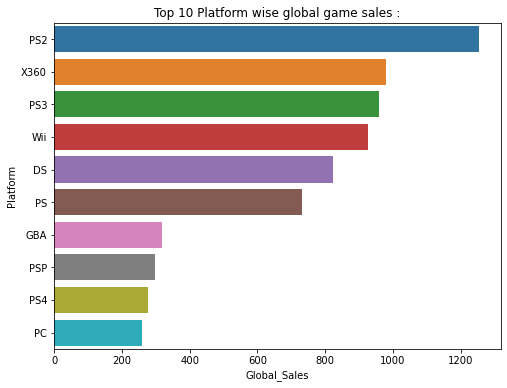

In [40]:
# visualize top 10 global avg game sales platform wise
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(vgdata ,index = 'Platform',
                                           values = 'Global_Sales',
                                           aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = 'Global_Sales',
                                                                 ascending = False).head(10)
sns.barplot(platform_wise_game_sales['Global_Sales'],platform_wise_game_sales.index,orient = 'h')
plt.title('Top 10 Platform wise global game sales :')

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

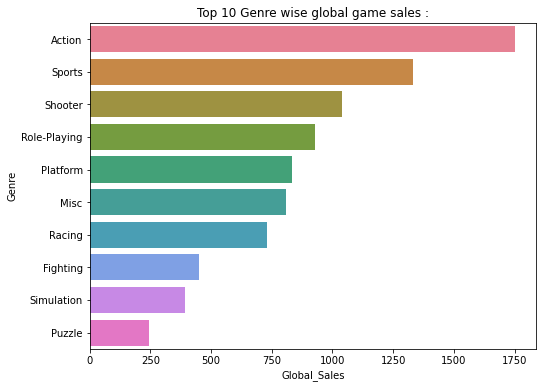

In [41]:
# visualize top 10 global avg game sales genre wise
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales  = pd.pivot_table(vgdata ,index = 'Genre',
                                        values = 'Global_Sales',
                                        aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(by = 'Global_Sales',
                                                           ascending = False).head(10)
sns.barplot(genre_wise_game_sales['Global_Sales'],genre_wise_game_sales.index,orient = 'h',palette = 'husl')
plt.title('Top 10 Genre wise global game sales :')

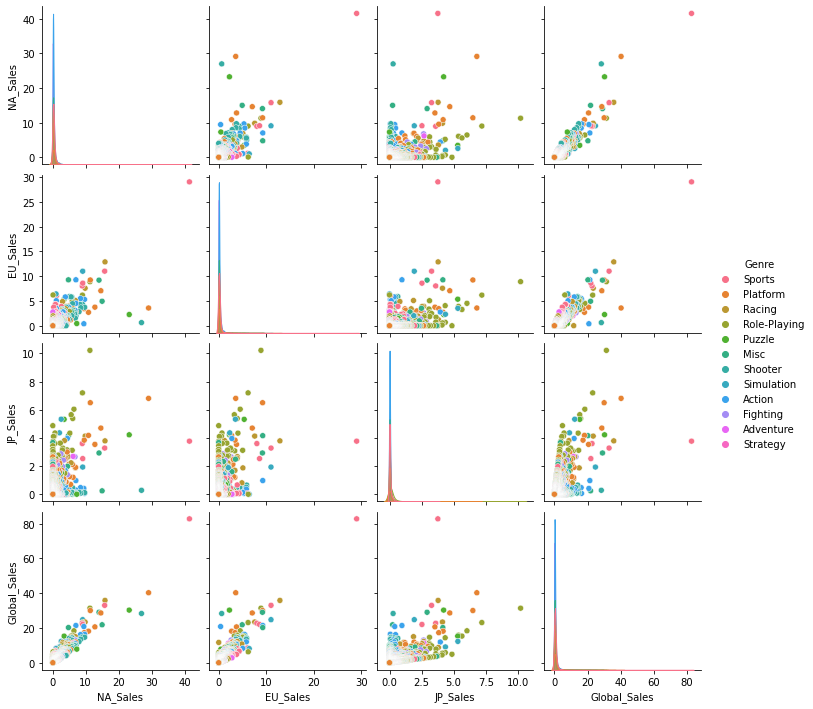

In [7]:
# pairplot
data_pair = vgdata.loc[:,["Publisher", "Genre", "Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]]
sns.pairplot(data_pair, hue="Genre")

In [4]:
# data cleaning
df = vgdata
for i in range(len(df)) : 
    if i <= 5000:
        df["Rank"] = df["Rank"].replace(i,"Top")
    elif (i > 5000 and i <= 10000):
        df["Rank"] = df["Rank"].replace(i,"Middle")
    else:
        df["Rank"] = df["Rank"].replace(i,"Bottom")
df["Rank"] = df["Rank"].replace(16598, "Bottom")
df["Rank"] = df["Rank"].replace(16599, "Bottom")
df["Rank"] = df["Rank"].replace(16600, "Bottom")
df["Year"].fillna(df["Year"].mode()[0], inplace=True)
df["Publisher"].replace(np.nan, df["Publisher"].mode()[0], inplace=True)
df["Platform"].replace("2600", "Atari", inplace=True)
df = df[df.Year < 2017].drop(columns=["Other_Sales"])
#
df["Key"] = np.arange(len(df))

In [10]:
# predictive modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
categorical_labels = ['Platform', 'Genre', 'Publisher']
numerical_lables = ['Global_Sales']
enc = LabelEncoder()
encoded_df = pd.DataFrame(columns=['Platform', 'Genre', 'Publisher', 'Global_Sales'])
for label in categorical_labels:
    temp_column = df[label]
    encoded_temp_col = enc.fit_transform(temp_column)
    encoded_df[label] = encoded_temp_col
for label in numerical_lables:
    encoded_df[label] = df[label].values

In [6]:
# without cross validation
x = encoded_df.iloc[:, 0:3]
y = encoded_df.iloc[:,3:]
scalar = StandardScaler()
x = scalar.fit_transform(x)
linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_pred = linear_reg.predict(x)
r2 = r2_score(y, y_pred)
print('\nLinear Regression Results without Cross Validation:')
print(f'MAE in $ (Millions): {mean_absolute_error(y_pred, y)}')
print(f'MSE in $ (Millions): {mean_squared_error(y_pred, y)}')
print(f'R2 Coeff: {r2}')


Linear Regression Results without Cross Validation:
MAE in $ (Millions): 0.58903244709908
MSE in $ (Millions): 2.4146062254789546
R2 Coeff: 0.0016084674898911855


In [7]:
# with cross validation
linear_reg = LinearRegression()
y_pred = cross_val_predict(linear_reg, x, y, cv=5)
r2 = r2_score(y, y_pred)
print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')
print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')
print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.737120879312106
MSE in Sales (Millions): 2.732836798587221
R2 Coeff: -0.1299735297006075


In [9]:
# Ridge Regression with Cross Validation
x = scalar.fit_transform(x)
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid={'alpha':range(0,10)}, refit=True)
y_pred = cross_val_predict(grid, x,y, cv=5)
r2 = r2_score(y, y_pred)
print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')
print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')
print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.7371222682534195
MSE in Sales (Millions): 2.732837842716903
R2 Coeff: -0.12997396142741335


In [11]:
# Lasso Regression with Cross Validation
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid={'alpha': range(1, 10)}, refit=True)
y_pred = cross_val_predict(grid, x, y, cv=5)
r2 = r2_score(y, y_pred)
print(f'MAE in Sales (Millions): {mean_absolute_error(y_pred, y)}')
print(f'MSE in Sales (Millions): {mean_squared_error(y_pred, y)}')
print(f'R2 Coeff: {r2}')

MAE in Sales (Millions): 0.7367908293510333
MSE in Sales (Millions): 2.7325841060965796
R2 Coeff: -0.12986904639383745


In [12]:
# MAE: Mean absolute error: the average of the absolute difference between
# the actural and predicted values in the dataset.

# MSE: Mean squared error: the average of the squared difference between
# the original and predicted values in the dataset.

# R2 coefficient: the proportion of the variance in the dependent variable
# which is explained by the linear regression model

In [13]:
# Lasso Regression was able to perform the best in terms of MAE and MSE. 